<center>Star Cluster Simulation Data Analysis<center>
-----
<center><img src="http://universe-beauty.com/albums/space/normal_Open-cluster-NGC-6397.JPG" height="800"/></center>

<center>Globular clusters are collections of hundreds of thousands of stars that are tightly bound by gravity which gives them their spherical shapes.<center>


<center>There are about 158 globular clusters in the Milky Way, while giant elliptical galaxies like M87 may have as many as 13,000 globular clusters.<center>

<center>These Clusters normally consist of Population II stars, which have a low proportion of elements other than hydrogen and helium. This is an indication of their old age.<center>

<center> Why would anyone want to study simulations? <center>

<center> And <center>

<center> What is it that we can learn from them? <center>

In [ ]:
reset -fs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
import math

from scipy import stats
from scipy.stats import ttest_1samp

py.plotly.tools.set_credentials_file(username='ashvets', api_key='uVVvSbkmQFs4cwizY8eX')

%matplotlib inline


In [4]:
# I got the idea to read all of my files this way from the Data Star Cluster kernel on kaggle.
# Since the data files have similar names that vary only by an integer I can read and append 
# them using a for loop with a 'step'. This step incriments the name for the file to be read.
# To each data file I add a time column to distinguish the data based on time. Also a radius magnitude, 
# speed, and kinetic energy column in order to have more features to analyze. 

G = 6.6740831*(10**(1/11))

df=pd.read_csv("/Users/ashvets/github/Star_Cluster_Simulation_Analysis/data/c_0000.csv.zip")
df['t'] = 0
df['v'] = np.sqrt(df.vx**2 + df.vy**2 + df.vz**2)
df['kinetic_energy'] = 0.5*df.m*(df.v)**2
df['r'] = np.sqrt(df.x**2 + df.y**2 + df.z**2)
df['log_r'] = np.log(df.r)
df['log_v'] = np.log(df.v)


for i in range(1,19):
    if i<10:
        step="0"+str(i)
    else:
        step=str(i)
    file="/Users/ashvets/github/Star_Cluster_Simulation_Analysis/data/c_"+step+"00.csv.zip"
    d=pd.read_csv(file)
    d['t']=i*100
    d['v'] = np.sqrt(d.vx**2 + d.vy**2 + d.vz**2)
    d['kinetic_energy'] = 0.5*d.m*(d.v)**2
    d['r'] = np.sqrt(d.x**2 + d.y**2 + d.z**2)
    d['log_r'] = np.log(d.r)
    d['log_v'] = np.log(d.v)

    df=df.append(d)
    

In [5]:
df.shape

(1215714, 14)

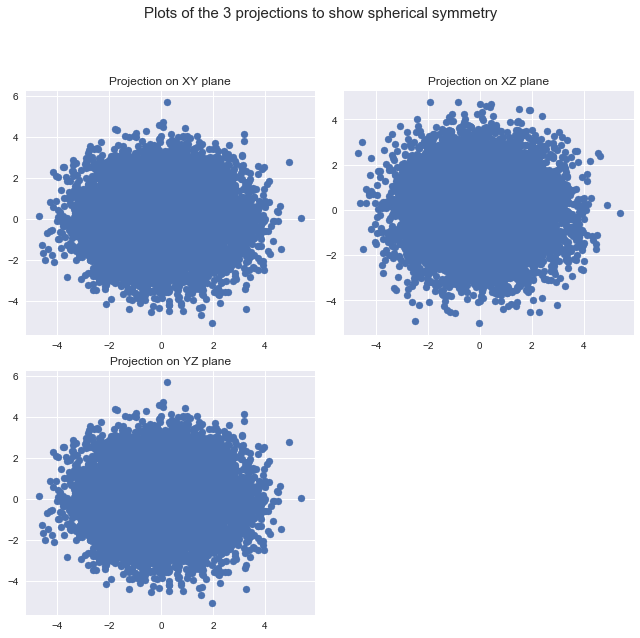

In [4]:
# Here I plot the different projections of the stars positions durint t = 0 in order to see if the cluster
# has spherical symmetry 

fig = plt.figure(figsize=[(9), (9)])

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
#ax1, ax2, ax3 = plt.subplots(1,4)
fig.suptitle('Plots of the 3 projections to show spherical symmetry', fontsize=15)

x = df[df['t'] == 0].x
y = df[df['t'] == 0].y
z = df[df['t'] == 0].z

ax1.set_title('Projection on XY plane')
ax1.scatter(x, y)

ax2.set_title('Projection on XZ plane')
ax2.scatter(x, z)

ax3.set_title('Projection on YZ plane')
ax3.scatter(x, y)

plt.tight_layout()
# Make space for title
plt.subplots_adjust(top=.85)
plt.show()


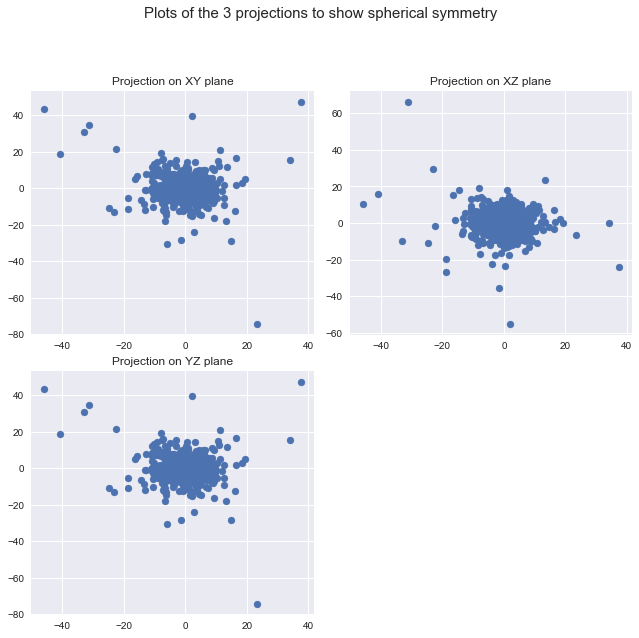

In [5]:
# Here I will plot the same projections but for the last time snapshot to see if the cluster retained spherical
# spherical symmetry

fig = plt.figure(figsize=[(9), (9)])

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
#ax1, ax2, ax3 = plt.subplots(1,4)
fig.suptitle('Plots of the 3 projections to show spherical symmetry', fontsize=15)

x = df[df['t'] == 1800].x
y = df[df['t'] == 1800].y
z = df[df['t'] == 1800].z

ax1.set_title('Projection on XY plane')
ax1.scatter(x, y)

ax2.set_title('Projection on XZ plane')
ax2.scatter(x, z)

ax3.set_title('Projection on YZ plane')
ax3.scatter(x, y)

plt.tight_layout()
# Make space for title
plt.subplots_adjust(top=.85)
plt.show()

In [6]:
df[df['t'] == 0].describe()

,x,y,z,vx,vy,vz,m,id,t,v,kinetic_energy,r,log_r,log_v
count,6.400000e+04,6.400000e+04,6.400000e+04,6.400000e+04,6.400000e+04,6.400000e+04,6.400000e+04,64000.000000,64000.0,64000.000000,6.400000e+04,64000.000000,64000.000000,64000.000000
mean,-1.176596e-10,3.412734e-10,2.464757e-10,1.101956e-10,2.103394e-10,1.820625e-11,1.562500e-05,32000.500000,0.0,0.647772,3.906247e-06,1.057820,-0.253754,-0.545761
std,7.807475e-01,7.814718e-01,7.719907e-01,4.088337e-01,4.078873e-01,4.080323e-01,2.483520e-17,18475.352951,0.0,0.283536,3.253578e-06,0.835005,0.825843,0.505564
min,-4.698981e+00,-5.095714e+00,-5.015129e+00,-1.619203e+00,-1.482613e+00,-1.685246e+00,1.562500e-05,1.000000,0.0,0.013670,1.459935e-09,0.014454,-4.236796,-4.292544
25%,-3.348223e-01,-3.366134e-01,-3.356278e-01,-2.697400e-01,-2.714544e-01,-2.709821e-01,1.562500e-05,16000.750000,0.0,0.435275,1.480192e-06,0.439836,-0.821354,-0.831777
50%,-4.818202e-04,-4.321573e-04,-3.949339e-03,-2.090700e-04,1.419134e-03,1.770830e-04,1.562500e-05,32000.500000,0.0,0.620811,3.010984e-06,0.804663,-0.217332,-0.476729
75%,3.347058e-01,3.321014e-01,3.305091e-01,2.691137e-01,2.707544e-01,2.700553e-01,1.562500e-05,48000.250000,0.0,0.833464,5.427045e-06,1.442035,0.366055,-0.182165
max,5.401047e+00,5.680950e+00,4.762590e+00,1.547319e+00,1.584202e+00,1.600681e+00,1.562500e-05,64000.000000,0.0,1.774601,2.460318e-05,5.705523,1.741435,0.573575


In [7]:
df[df['t'] == 1800].describe()

,x,y,z,vx,vy,vz,m,id,t,v,kinetic_energy,r,log_r,log_v
count,63970.000000,63970.000000,63970.000000,63970.000000,63970.000000,63970.000000,6.397000e+04,63970.000000,63970.0,63970.000000,6.397000e+04,63970.000000,63970.000000,63970.000000
mean,-0.097641,0.108541,0.002470,-0.000057,0.000058,-0.000011,1.562500e-05,31999.703767,1800.0,0.642610,3.904349e-06,1.225479,-0.211195,-0.568275
std,1.114019,1.167453,1.138541,0.408436,0.407922,0.408099,2.482165e-17,18474.635656,0.0,0.294635,3.387381e-06,1.555557,0.906825,0.545100
min,-45.904686,-74.205772,-55.079330,-1.715907,-1.746520,-1.594294,1.562500e-05,1.000000,1800.0,0.008339,5.432557e-10,0.006555,-5.027577,-4.786828
25%,-0.422857,-0.224396,-0.322137,-0.264278,-0.263457,-0.265655,1.562500e-05,16000.250000,1800.0,0.421918,1.390738e-06,0.424971,-0.855734,-0.862945
50%,-0.092186,0.104792,0.004419,0.000032,0.000073,0.000195,1.562500e-05,31999.500000,1800.0,0.615314,2.957897e-06,0.803981,-0.218179,-0.485623
75%,0.235902,0.433362,0.333841,0.264821,0.263232,0.264869,1.562500e-05,47997.750000,1800.0,0.834083,5.435108e-06,1.543112,0.433801,-0.181423
max,37.500210,47.199211,66.224838,1.751206,1.593580,1.763559,1.562500e-05,64000.000000,1800.0,1.831593,2.620886e-05,80.937942,4.393683,0.605186


In [8]:
downsample_size = 300

In [9]:
# Here I use plotly to plot a sample of the stars from the cluster at t = 0 and t = 1800 in 3-D to get a 
# a visiual comparison of their positions.

x, y, z = df[df['t'] == 0].x, df[df['t'] == 0].y, df[df['t'] == 0].z
x, y, z = x[:downsample_size], y[:downsample_size], z[:downsample_size]

trace1 = go.Scatter3d(
    x=x,
    y=y,

    z=z,
    name = 'Time cluster, t = 0',
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='teal',
            width=0.5
        ),
        opacity=0.8
    )
)

x2, y2, z2 = df[df['t'] == 1800].x, df[df['t'] == 1800].y, df[df['t'] == 1800].z
x2, y2, z2 = x2[:downsample_size], y2[:downsample_size], z2[:downsample_size]

trace2 = go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    name = 'Time cluster, t = 1800',
    mode='markers',
    marker=dict(
        color='purple',
        size=12,
        symbol='circle',
        line=dict(
            color='white',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace1, trace2]


In [10]:
layout = go.Layout(
    title='Star Cluster at time 0 and time 1800',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

In [11]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = "Stars")

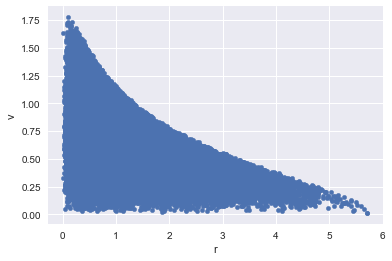

In [12]:
df[df.t == 0].plot(kind='scatter',
         x='r',
         y='v');

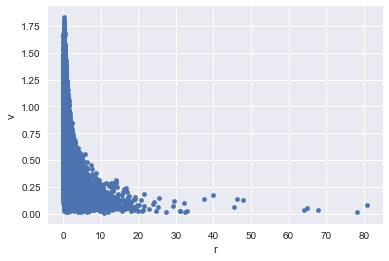

In [13]:
df[df.t == 1800].plot(kind='scatter',
         x='r',
         y='v');

In [14]:
# Lets look at the distribution of the velocity and the radius of the stars during the first snapshot and the last one.

v_0 = df[df['t'] == 0].v
r_0 = df[df['t'] == 0].r

v_f = df[df['t'] == 1800].v
r_f = df[df['t'] == 1800].r


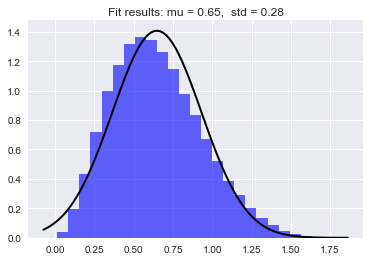

In [15]:
mu, std = stats.norm.fit(v_0)
plt.hist(v_0, bins=25, normed=True, alpha=0.6, color='b')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()


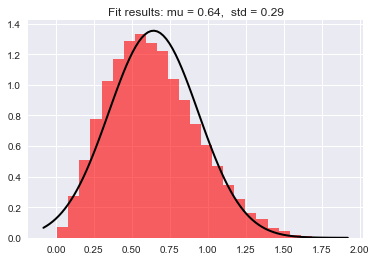

In [16]:
mu, std = stats.norm.fit(v_f)
plt.hist(v_f, bins=25, normed=True, alpha=0.6, color='r')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()


So based on the previous two graphs we can say that the velocity of the stars follows a near normal distribution, but our model under-represents the smaller velocities and over-represents the larger ones since it is skewed to the right. 

If we treat $v_0$ and $v_f$ as two independent samples, we can also perform a two-sample t-test statistic to see if the means of the two samples are different.

$H_0: \mu_{v_0} = \mu_{v_f}$

$H_a: \mu_{v_0} \ne \mu_{v_f}$

Lets pick our $\alpha$ to be .05

In [17]:
t_statistic, two_tailed_p_value = stats.ttest_ind(v_0, v_f, equal_var = False)

print(f't-test statistic: {t_statistic:.2}')
print(f'p-value: {two_tailed_p_value:.2}')

t-test statistic: 3.2
p-value: 0.0014


Since the p-value is smaller than $\alpha$ we can reject the null hypothesis and say that $\mu_{v_0} \ne \mu_{v_f}$

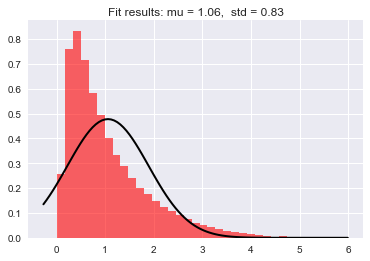

In [18]:
# Now for the radius distribution

mu, std = stats.norm.fit(r_0)
plt.hist(r_0, bins=35, normed=True, alpha=0.6, color='r')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

Clearly a the radius distribution does not resemble a normal distribution, but of course this is to be expected. What we can conclude from this is that there is a higher density of stars near the core of the cluster that decreases as the radius decreases. Why is that? Well some of the reasons include gravitational pull towards the center of mass and the gradiant of pressure pushing against the mass.

It seems the radius distribution quickly grows exponentially and then decreases exponentially at a slower rate. Lets see if some of the exponential distributions would match the data better.

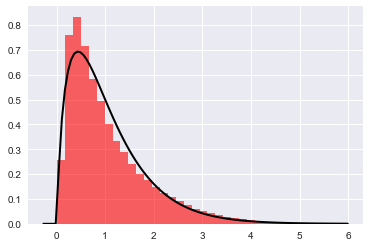

In [19]:
# Gamma distribution

plt.hist(r_0, bins=35, normed=True, alpha=0.6, color='r')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

shape, loc, scale = stats.gamma.fit(r_0)

p = stats.gamma.pdf(x, shape, loc, scale)
plt.plot(x, p, 'k', linewidth=2)

plt.show()

Okay so it seems the gamma distribution does indeed represent our data better then the normal distribution, but still under-represents a lot of the values near the peak. Lets try another distribution.

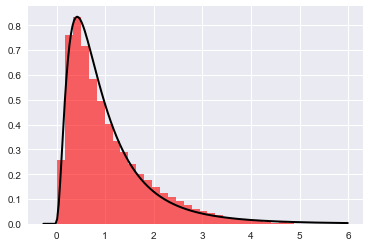

In [20]:
# Lognormal distribution

plt.hist(r_0, bins=35, normed=True, alpha=0.6, color='r')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
shape, loc, scale = stats.lognorm.fit(r_0)

p = stats.lognorm.pdf(x, shape, loc, scale)
plt.plot(x, p, 'k', linewidth=2)

plt.show()

Sweet, the log-normal distribution fits even better! It does over-represent the data at times, but hey no model is a perfect model.
After trying different distributions such as chi-squared, and pure exponential, I determined that the log-normal is indeed our best fit. It does the best job representing the pre-peak exponential rise and the fall due to the increase in radius. 

Therefore when modeling other globular clusters for which we couldn't gather enough data due to the viewing angle or other reasons, the log-normal distribution would work best to fill the data gaps.

In [28]:
X = (df[df['t'] == 0].r)
X = sm.add_constant(X)
y = (df[df['t'] == 0].log_v)

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_v   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                 2.121e+04
Date:                Fri, 10 Mar 2017   Prob (F-statistic):               0.00
Time:                        08:50:10   Log-Likelihood:                -37999.
No. Observations:               64000   AIC:                         7.600e+04
Df Residuals:                   63998   BIC:                         7.602e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.2262      0.003    -80.931      0.000        -0.232    -0.221
r             -0.3021      0.002   -145.630      0.000        -0.306    -0.298
==============================================================================
Omnibus:                    13646.002   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30897.920
Skew:                          -1.218   Prob(JB):                         0.00
Kurtosis:                       5.378   Cond. No.                         3.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
results.params

const   -0.226228
r       -0.302067
dtype: float64

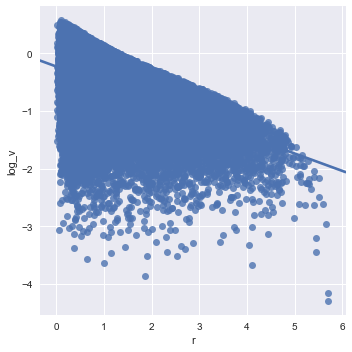

In [30]:
sns.lmplot('r', 
           'log_v',
           data=df[df['t'] == 0]);

In [31]:
# Quadratic Fit
X2 = df[df['t'] == 0].r
X2 = np.vander(X2, 5) # add a constant and quadratic term
y = (df[df['t'] == 0].log_v)

results_fourth_degree = sm.OLS(y, X2).fit()
results_fourth_degree.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_v   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     5367.
Date:                Fri, 10 Mar 2017   Prob (F-statistic):               0.00
Time:                        08:50:22   Log-Likelihood:                -37901.
No. Observations:               64000   AIC:                         7.581e+04
Df Residuals:                   63995   BIC:                         7.586e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0075      0.001     -8.373      0.000        -0.009    -0.006
x2             0.0672      0.008      8.370      0.000         0.052     0.083
x3            -0.2074      0.023     -8.929      0.000        -0.253    -0.162
x4            -0.0578      0.024     -2.364      0.018        -0.106    -0.010
const         -0.3027      0.007    -40.720      0.000        -0.317    -0.288
==============================================================================
Omnibus:                    13586.846   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30750.585
Skew:                          -1.213   Prob(JB):                         0.00
Kurtosis:                       5.376   Cond. No.                         947.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

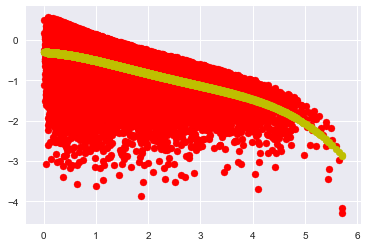

In [32]:
plt.scatter(df[df['t'] == 0].r, y=df[df['t'] == 0].log_v, color="r", label="Data");
plt.scatter(df[df['t'] == 0].r, y=results_fourth_degree.predict(), color="y", label="Cubic")
plt.show();


In [33]:
# We can check if all the stars have remained in the cluster

print(len(r_0), len(r_f))

64000 63970


In [34]:
# How many stars escaped

escaped_stars_id = list(set(df[df['t'] == 0].id) - set(df[df['t'] == 1800].id))
len(escaped_stars_id)

30

Lets see if we can find a reason why these stars have escaped.. maybe they continuously got further and further from the center of the cluster, or maybe due to their interactions with other stars their velocities reached peak velocity and they where flung out of the cluster.

In [35]:
all_stars = pd.Index(df[df['t'] == 0].id)
stars_in_id = pd.Index(df[df['t']==1800].id)
stars_in = df[df['id'].isin(stars_in_id)]
escaped_stars = df[df['id'].isin(escaped_stars_id)]

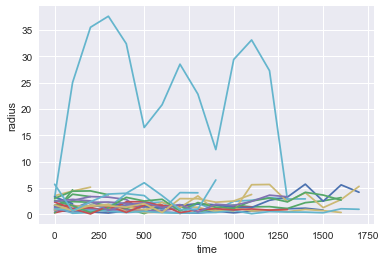

In [36]:
# Lets first take a look at how their radius varied throughout time.

for i in escaped_stars_id:
    plt.plot(escaped_stars[escaped_stars['id'] == i].t, escaped_stars[escaped_stars['id'] == i].r)
plt.xlabel('time')
plt.ylabel('radius')
plt.grid('on')
plt.show;

It appears that all but one of the stars remained relatively close to the center of the cluster throughout the time intervals up to the point of them disappearing.

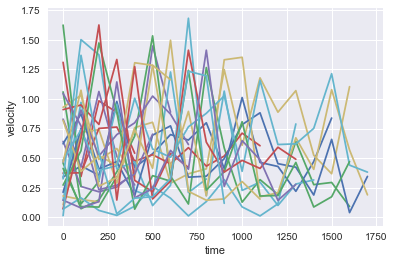

In [37]:
# Now lets look at how their velocity has changed over time 

for i in escaped_stars_id:
    plt.plot(escaped_stars[escaped_stars['id'] == i].t, escaped_stars[escaped_stars['id'] == i].v)
plt.xlabel('time')
plt.ylabel('velocity')
plt.grid('on')
plt.show;

It also appears that the velocities of the these escaped stars, although varied over time, remained around the mean velocity. The variance in the velocities is to be expected due to the non perfectly spherical orbits and mainly because of the stars interactions with one another.

Therefore, it appears the time intervals in this simulation are way to large to determine what caused these stars to escape. (In fact on average it would take a star $10^5$ years to cross the cluster, and these snapshots are about 100 crossing times apart. The close encounters that might have caused these stars to be flung out of the cluster can last just a few years). 

Even though the velocity doesn't appear to explain the chances of a star escaping lets find the range of velocities of the escaped stars at the initial time and predict the chances of a star escaping with a velocity falling in that range during the initial time.

In [38]:
escaped_stars[escaped_stars['t'] == 0].v.describe()

count    30.000000
mean      0.529819
std       0.393051
min       0.013670
25%       0.226424
50%       0.463451
75%       0.775441
max       1.624745
Name: v, dtype: float64

In [39]:
stars_in[stars_in['t'] == 0].v.describe()

count    63970.000000
mean         0.647827
std          0.283467
min          0.015643
25%          0.435419
50%          0.620832
75%          0.833506
max          1.774601
Name: v, dtype: float64

Lets use Bayes' theorem to find the probability of a star escaping given that its velocity at t = 0 falls 
within the interval of the velocities of the escaped stars at t = 0.

$P(escaping | v(0.013 - 1.625)) = \frac{P(v (0.013 - 1.625) | escaping)P(escaping)}{P(v (0.013 - 1.625)}$

In [40]:
stars = df[df['t'] == 0]
stars_above_v = stars[stars['v'] > .013]
stars_with_critical_v = stars_above_v[stars_above_v['v'] < 1.625]
len(stars_with_critical_v)

63969

In [41]:
p = (1 * (30/6400)) / (63969 / 64000)
print(p)

0.004689771608122684


So our intuition from the graphs about the iniability to predict whether a star will escape or not based on its  velocity at t = 0 was correct. Maybe if the data set included smaller intervals of time we would be able to predict the escape velocity of the cluster, or see the close incounter interaction that flung a particular star out of the cluster.

From the graphs we saw that the relative shape of the globular cluster expanded a bit over time, so lets see just how much. 

First I decided to calculate the center of mass of the cluster during the first and last time snapshot. 

In [42]:
def cm(dataframe):
    x_cm = sum(dataframe.x * dataframe.m) / sum(dataframe.m)
    y_cm = sum(dataframe.y * dataframe.m) / sum(dataframe.m)
    z_cm = sum(dataframe.z * dataframe.m) / sum(dataframe.m)
    return(x_cm, y_cm, z_cm)

In [43]:
cm(df[df['t'] == 0])

(-1.1765957064709906e-10, 3.4127344904636324e-10, 2.4647573084419604e-10)

In [44]:
cm(df[df['t'] == 1800])

(-0.097640882801575374, 0.10854126305787026, 0.0024699693488793801)

So it appears the center of mass of the star cluster has moved. In order to determine if this move is significant we need to also compare how the effective radius of the cluster has changed as well. But in order to find the effective radius we there are a few other features we need to calculate first.

For star clusters an important feature to know is velocity dispersion. Orbits, which support 
a self-gravitating body against collapse can either be ordered or random. An example of ordered motion
is rotation, in which the majority of stars orbit in the same direction. If a galaxy shows strong rotation it is 
said to be ‘rotation supported’. An example of this would be the disks of spiral galaxies.

However, star clusters typically possess little or no rotation. 
In these situations the stellar orbits are random, with as many stars orbiting in one direction as there are 
orbiting in another. Such galaxies are said to be ‘velocity dispersion’ (or pressure) supported. 


In [45]:
sigma = np.sqrt(np.sum(((df[df['t'] == 0].v) - np.mean(df[df['t'] == 0].v))**2) / np.size(df[df['t'] == 0].v))
print("Velocity dispersion: {0:.2f}".format(sigma))


Velocity dispersion: 0.28


Hmmm... seems familiar..

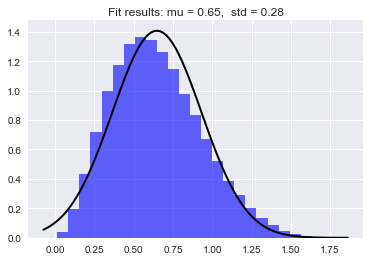

In [46]:
mu, std = stats.norm.fit(v_0)
plt.hist(v_0, bins=25, normed=True, alpha=0.6, color='b')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()


In [47]:
FWHM = sigma * 3.55

Astronomy is an observational science so typically it is easier to observe certain quantities and use them and mathematical formulas to derive others. Since star clusters like the one simulated here don't have clearly defined boundaries astronomers often use $R_{eff}$ to describe a star cluster. $R_{eff}$ is the radius in which half the star clusters luminosity is contained. 

In our data set we are given the total mass but not $R_{eff}$ since this is simulated data and not observed. So lets use the mass to derive $R_{eff}$.

$M = 3\sigma^2\frac{R_{eff}}{G}$

$R_{eff} = \frac{M*G}{3\sigma^2}$

But considering this is a simulation that has no units I decided to drop the universal gravitational constant out of the equation since it would be impossible to convert it to our imaginary point particle units.

In [48]:
r_eff_0 = (sum(df[df['t'] == 0].m)) / (3 * sigma**2)
print("R_eff(t = 0): {0:.3f}".format(r_eff_0))

R_eff(t = 0): 4.146


In [49]:
r_eff_f = (sum(df[df['t'] == 1800].m)) / (3 * sigma**2)
print("R_eff(t = 1800): {0:.3f}".format(r_eff_f))

R_eff(t = 1800): 4.144


How can we check if this effective radius makes sense? Well by definition the effective radius captures half the luminosity of the cluster. We are not given any flux values from which we can calculate the luminosity of each star, so lets use the fact that each star has the same mass and make the following assumption:

$L \propto V$

$V = \frac{4}{3}\pi r^3$

Lets use the max radius at t = 0

In [50]:
r_0_max = (df[df['t'] == 0].r.max())
volume = (4 / 3) * math.pi * r_0_max**3
print(volume)

777.99163717


We want the radius that represents half the luminosity, so

$V/2 \Rightarrow$ and now calculate the radius associated with this. $r_{eff} = (\frac{3V}{8\pi})^{\frac{1}{3}}$

In [51]:
r_eff = ((3 * volume) / (8 * math.pi))**(1/3)
print(r_eff)

4.52847639091


Considering we made the assumption that $L \propto V$ I'm confident that we found the correct effective radius: 

$r_{eff} = 4.246$

This is an astonishing result because we where able to find it a very important feautre of our open cluster by using the total mass of the cluster and the velocity despersion (or the standard deviation of the the velocity distribution!)

Results:

1. We where able to confirm spherical symmetry of the cluster
2. Fit a normal distribution curve to the velocities of the stars in our  open cluster 
3. Fit a log-normal distribution of the radius to the stars
4. Determine that a linear nor a polynomial model should be used to predict the relationship between the radius and the velocity
5. Calculate the velocity dispersion and see its resemblense to the standard deviation of the velocity distribution
6. Calculate the effective radius

Conclusion:

This data set is useful to extract some basic information about the distributions of some of the features, and derive a few parameters. However, more detailed simulation is needed to do further analysis.

It would have been nice to have shorter intervals between the time snapshots so that we can see/derive the reasons why some of the stars left the cluster. Also more useful and accurate calculations could have been done if the data consisted of realistic values and had units instead of being all point values.

THE END! Happy Spring break!
------